In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn import ensemble
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In this file, a dataset on churn data of a telecom company is analysed. 
The Dataset has 22 columns and 12,892 rows, labels included. The dataset is a clean data with no missing value.
Since the dataset is clean, removal of 10% data at random from the dataset and treating the NaN values is the next step.

In [2]:
df=pd.read_csv("Customer Attrition.csv")

In [3]:
df.head() #returns first 5 rows by default

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


In [4]:
df.shape

(12892, 22)

The Churn percentage for the total clean data is 14%.
The 14% indicates that from the entire population 14% of the population are probably going to switch to a new brand and not continue with the current brand. 

In [5]:
y_yes=df["churn"][df["churn"]== "yes"]
print("Churn Percentage = ",str((y_yes.shape[0]/df["churn"].shape[0]*100)))

Churn Percentage =  14.14055228048402


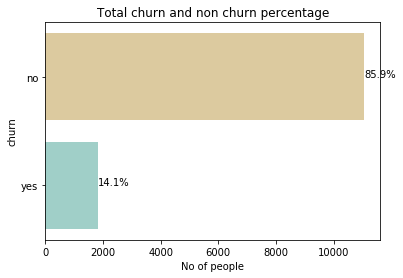

In [6]:
total = len(df['churn'])
ax = sns.countplot(y="churn", data=df, palette="BrBG")
ax.set_title('Total churn and non churn percentage')
plt.xlabel('No of people')

total = len(df['churn'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [7]:
df.isna().sum()

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

Since it is a clean data there are no NaN values. 
Hence the next step would be to randomly remove 10% of the data from the entire dataset. 

In [8]:
import random
df = df.mask(np.random.random(df.shape) < .1)
df.info()
#Randomly removing 10% of the data from the entire dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
recordID                         11625 non-null float64
state                            11509 non-null object
account_length                   11614 non-null float64
area_code                        11579 non-null float64
international_plan               11593 non-null object
voice_mail_plan                  11552 non-null object
number_vmail_messages            11624 non-null float64
total_day_minutes                11612 non-null float64
total_day_calls                  11615 non-null float64
total_day_charge                 11614 non-null float64
total_eve_minutes                11662 non-null float64
total_eve_calls                  11602 non-null float64
total_eve_charge                 11611 non-null float64
total_night_minutes              11558 non-null float64
total_night_calls                11618 non-null float64
total_night_charge               11590 non-null float6

In [9]:
df.isna().sum()

recordID                         1267
state                            1383
account_length                   1278
area_code                        1313
international_plan               1299
voice_mail_plan                  1340
number_vmail_messages            1268
total_day_minutes                1280
total_day_calls                  1277
total_day_charge                 1278
total_eve_minutes                1230
total_eve_calls                  1290
total_eve_charge                 1281
total_night_minutes              1334
total_night_calls                1274
total_night_charge               1302
total_intl_minutes               1317
total_intl_calls                 1304
total_intl_charge                1286
number_customer_service_calls    1287
churn                            1343
customer_id                      1344
dtype: int64

NaN values are inserted in the dataset.

In [10]:
df.head(5)

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1.0,HI,101.0,NaN,no,NaN,0.0,70.9,123.0,NaN,...,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3.0,no,23383607.0
1,2.0,MT,137.0,510.0,no,NaN,0.0,223.6,86.0,38.01,...,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0.0,no,22550362.0
2,3.0,OH,103.0,408.0,no,yes,29.0,294.7,95.0,NaN,...,20.17,300.3,127.0,13.51,NaN,6.0,3.70,1.0,no,59063354.0
3,4.0,NM,99.0,415.0,no,no,0.0,216.8,123.0,NaN,...,10.74,220.6,82.0,9.93,NaN,2.0,4.24,1.0,no,25464504.0
4,5.0,SC,108.0,415.0,NaN,NaN,0.0,197.4,78.0,33.56,...,NaN,204.5,NaN,9.20,7.7,4.0,2.08,2.0,no,691824.0


Text(0.5, 1.0, 'Bar Plot for Churn')

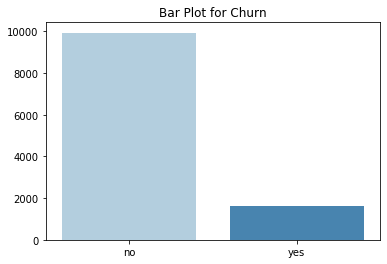

In [11]:
y=df['churn'].value_counts()
ax=sns.barplot(y.index,y.values,palette="Blues")
ax.set_title("Bar Plot for Churn")

In [12]:
y_yes=df["churn"][df["churn"]== "yes"]
print("Churn Percentage = "+str((y_yes.shape[0]/df["churn"].shape[0]*100)))

Churn Percentage = 12.550418864412038


In [13]:
df.describe()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,11625.000000,11614.000000,11579.000000,11624.000000,11612.000000,11615.000000,11614.000000,11662.000000,11602.000000,11611.000000,11558.000000,11618.000000,11590.000000,11575.000000,11588.000000,11606.000000,11605.000000,1.154800e+04
mean,6430.268903,100.648614,437.170049,7.999828,180.000138,100.343435,30.574550,200.586032,100.169023,17.069414,200.474485,100.069031,9.030694,10.242661,4.471436,2.762181,1.566394,3.159287e+11
std,3721.289562,39.829267,42.372286,13.633544,54.286408,19.917972,9.215722,50.776591,19.919962,4.300513,50.560700,19.738749,2.268875,2.776730,2.457783,0.754241,1.315857,3.387256e+13
min,1.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3207.000000,73.000000,408.000000,0.000000,144.000000,87.000000,24.430000,165.900000,87.000000,14.140000,166.900000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,2.413209e+07
50%,6409.000000,100.000000,415.000000,0.000000,179.500000,101.000000,30.500000,201.000000,100.000000,17.120000,200.800000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,3.220339e+07
75%,9653.000000,127.000000,510.000000,19.000000,216.200000,114.000000,36.750000,234.775000,114.000000,19.970000,235.000000,113.000000,10.580000,12.100000,6.000000,3.240000,2.000000,5.534218e+07
max,12892.000000,243.000000,510.000000,52.000000,351.500000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


Treat the NaN values: There are numerous methods to fill NaN values. Here, pandas inbuilt method interpolate and fillna are use to fill the NaN values.

In [14]:
df.interpolate(method="linear",limit_direction="both",inplace=True)

In [15]:
df.isna().sum()

recordID                            0
state                            1383
account_length                      0
area_code                           0
international_plan               1299
voice_mail_plan                  1340
number_vmail_messages               0
total_day_minutes                   0
total_day_calls                     0
total_day_charge                    0
total_eve_minutes                   0
total_eve_calls                     0
total_eve_charge                    0
total_night_minutes                 0
total_night_calls                   0
total_night_charge                  0
total_intl_minutes                  0
total_intl_calls                    0
total_intl_charge                   0
number_customer_service_calls       0
churn                            1343
customer_id                         0
dtype: int64

After filling the missing values there are still some columns where the NaN values are not filled, these columns are non numeric and can't be filled using interpolate. Hence as shown below the inbuilt method bfill(backward fill) or ffill(forwardfill) to fill the remaining NaN values. 

In [16]:
df.fillna(method="ffill",inplace=True)
df.fillna(method="bfill",inplace=True)

In [17]:
df.isna().sum()

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

In [18]:
y_yes=df["churn"][df["churn"]== "yes"]
print("Churn Percentage = "+str((y_yes.shape[0]/df["churn"].shape[0]*100)))
# 14.20 percent tend to leave 

Churn Percentage = 13.962147067949115


In [19]:
df.describe()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,12892.00000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,1.289200e+04
mean,6446.50000,100.562558,437.225489,8.021176,180.050624,100.325861,30.597522,200.721513,100.161845,17.068038,200.465521,100.144120,9.023220,10.240568,4.466685,2.759805,1.571401,2.830610e+11
std,3721.74417,38.869881,41.351075,13.311891,52.935555,19.420875,8.993761,49.586583,19.485137,4.203576,49.268055,19.242718,2.213632,2.705990,2.391465,0.736430,1.285461,3.205835e+13
min,1.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3223.75000,74.000000,411.500000,0.000000,145.400000,88.000000,24.620000,167.300000,87.000000,14.210000,167.900000,87.000000,7.550000,8.500000,3.000000,2.300000,1.000000,2.420738e+07
50%,6446.50000,100.000000,415.000000,0.000000,179.500000,101.000000,30.525000,201.100000,100.000000,17.090000,200.700000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,3.238865e+07
75%,9669.25000,126.000000,462.500000,17.500000,215.400000,113.000000,36.640000,233.700000,113.000000,19.860000,233.300000,113.000000,10.500000,12.000000,6.000000,3.240000,2.000000,5.492248e+07
max,12892.00000,243.000000,510.000000,52.000000,351.500000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


In [20]:
cols=df.columns
correlations=df[cols].corr()
correlations

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
recordID,1.000000,0.018210,0.006725,0.008747,-0.004330,0.009696,-0.004443,0.011452,-0.000915,0.006888,0.008263,0.007083,0.004055,0.001652,0.013105,-0.006097,-0.009474,0.008370
account_length,0.018210,1.000000,-0.003170,-0.007022,0.007968,0.031450,0.007259,0.000251,0.010938,-0.009175,0.004168,-0.000384,0.006242,0.004203,0.020822,0.003688,-0.009489,0.016420
area_code,0.006725,-0.003170,1.000000,0.006003,-0.011001,-0.008280,-0.011185,0.000170,-0.005730,0.002007,-0.009800,0.009646,-0.007049,0.000474,-0.005526,-0.006286,0.017650,0.015512
number_vmail_messages,0.008747,-0.007022,0.006003,1.000000,0.002848,-0.001624,-0.008311,0.018731,-0.004175,0.017075,0.010877,0.001262,0.005870,0.009603,0.014747,0.006887,-0.008838,-0.005308
total_day_minutes,-0.004330,0.007968,-0.011001,0.002848,1.000000,-0.001251,0.853226,-0.000352,0.010275,0.006701,-0.002370,0.017189,0.000467,-0.019208,-0.003088,-0.018504,0.003551,0.018597
total_day_calls,0.009696,0.031450,-0.008280,-0.001624,-0.001251,1.000000,0.000348,-0.006361,-0.001609,-0.009625,0.012405,-0.010539,0.006677,0.011683,0.000716,0.021586,-0.017528,0.019352
total_day_charge,-0.004443,0.007259,-0.011185,-0.008311,0.853226,0.000348,1.000000,-0.000219,0.006206,0.005637,-0.004527,0.016895,-0.006303,-0.014929,-0.007262,-0.012292,0.003006,0.012144
total_eve_minutes,0.011452,0.000251,0.000170,0.018731,-0.000352,-0.006361,-0.000219,1.000000,-0.002648,0.857568,-0.013135,0.018664,-0.011654,-0.001689,0.004597,-0.011923,-0.015647,0.002417
total_eve_calls,-0.000915,0.010938,-0.005730,-0.004175,0.010275,-0.001609,0.006206,-0.002648,1.000000,-0.008675,-0.002179,0.004902,-0.002304,0.004754,0.014073,-0.001344,0.006295,0.015297
total_eve_charge,0.006888,-0.009175,0.002007,0.017075,0.006701,-0.009625,0.005637,0.857568,-0.008675,1.000000,-0.019441,0.013294,-0.015657,0.001783,0.003893,-0.007140,-0.013926,0.002419


Text(0.5, 1, 'Correlation heatmap')

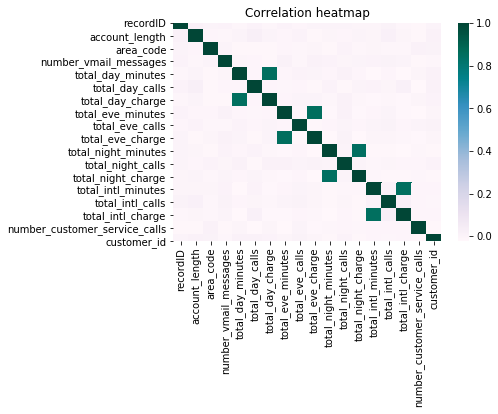

In [21]:
# sns.palplot(sns.color_palette("Greens"))
ax=sns.heatmap(correlations,cmap="PuBuGn")
ax.set_title("Correlation heatmap")

In [22]:
df.corr()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
recordID,1.000000,0.018210,0.006725,0.008747,-0.004330,0.009696,-0.004443,0.011452,-0.000915,0.006888,0.008263,0.007083,0.004055,0.001652,0.013105,-0.006097,-0.009474,0.008370
account_length,0.018210,1.000000,-0.003170,-0.007022,0.007968,0.031450,0.007259,0.000251,0.010938,-0.009175,0.004168,-0.000384,0.006242,0.004203,0.020822,0.003688,-0.009489,0.016420
area_code,0.006725,-0.003170,1.000000,0.006003,-0.011001,-0.008280,-0.011185,0.000170,-0.005730,0.002007,-0.009800,0.009646,-0.007049,0.000474,-0.005526,-0.006286,0.017650,0.015512
number_vmail_messages,0.008747,-0.007022,0.006003,1.000000,0.002848,-0.001624,-0.008311,0.018731,-0.004175,0.017075,0.010877,0.001262,0.005870,0.009603,0.014747,0.006887,-0.008838,-0.005308
total_day_minutes,-0.004330,0.007968,-0.011001,0.002848,1.000000,-0.001251,0.853226,-0.000352,0.010275,0.006701,-0.002370,0.017189,0.000467,-0.019208,-0.003088,-0.018504,0.003551,0.018597
total_day_calls,0.009696,0.031450,-0.008280,-0.001624,-0.001251,1.000000,0.000348,-0.006361,-0.001609,-0.009625,0.012405,-0.010539,0.006677,0.011683,0.000716,0.021586,-0.017528,0.019352
total_day_charge,-0.004443,0.007259,-0.011185,-0.008311,0.853226,0.000348,1.000000,-0.000219,0.006206,0.005637,-0.004527,0.016895,-0.006303,-0.014929,-0.007262,-0.012292,0.003006,0.012144
total_eve_minutes,0.011452,0.000251,0.000170,0.018731,-0.000352,-0.006361,-0.000219,1.000000,-0.002648,0.857568,-0.013135,0.018664,-0.011654,-0.001689,0.004597,-0.011923,-0.015647,0.002417
total_eve_calls,-0.000915,0.010938,-0.005730,-0.004175,0.010275,-0.001609,0.006206,-0.002648,1.000000,-0.008675,-0.002179,0.004902,-0.002304,0.004754,0.014073,-0.001344,0.006295,0.015297
total_eve_charge,0.006888,-0.009175,0.002007,0.017075,0.006701,-0.009625,0.005637,0.857568,-0.008675,1.000000,-0.019441,0.013294,-0.015657,0.001783,0.003893,-0.007140,-0.013926,0.002419


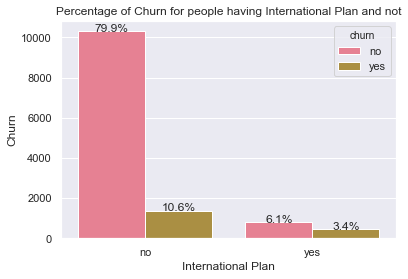

In [23]:
# df.groupby([ "international_plan","churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 
# plt.title('State-wise Churn')

total = len(df['churn'])
sns.set(style="darkgrid",palette="husl")
ax = sns.countplot(x="international_plan", hue="churn", data=df) 
ax.set_title("Percentage of Churn for people having International Plan and not")
ax.set(xlabel="International Plan",ylabel="Churn")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

In [24]:
y=df["international_plan"][df["international_plan"]== "yes"]
print("Churn Percentage = ",str((y.shape[0]/df["international_plan"].shape[0]*100)))
n=df["international_plan"][df["international_plan"]== "no"]
print("Churn Percentage = ",str((n.shape[0]/df["international_plan"].shape[0]*100)))

Churn Percentage =  9.517530251318647
Churn Percentage =  90.48246974868135


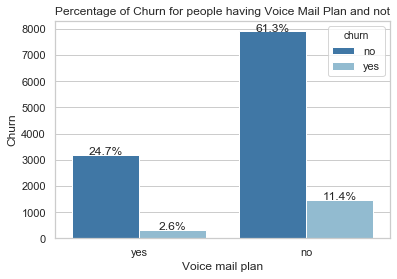

In [25]:
# df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 
total = len(df['churn'])
sns.set(style="whitegrid",palette="RdBu_r")
ax = sns.countplot(x="voice_mail_plan", hue="churn", data=df) 
ax.set_title("Percentage of Churn for people having Voice Mail Plan and not")
ax.set(xlabel="Voice mail plan",ylabel="Churn")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center") 

In [26]:
y=df["voice_mail_plan"][df["voice_mail_plan"]== "yes"]
print("Churn Percentage = ",str((y.shape[0]/df["voice_mail_plan"].shape[0]*100)))
n=df["voice_mail_plan"][df["voice_mail_plan"]== "no"]
print("Churn Percentage = ",str((n.shape[0]/df["voice_mail_plan"].shape[0]*100)))

Churn Percentage =  27.28824076946944
Churn Percentage =  72.71175923053056


In [27]:
# df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 
# plt.title("State-wise Churn")

<function matplotlib.pyplot.show(*args, **kw)>

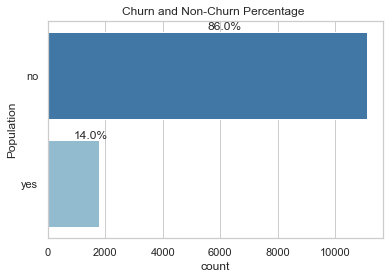

In [28]:
ax = sns.countplot(y="churn", data=df)
ax.set_title('Churn and Non-Churn Percentage ')
plt.ylabel('Population')
total=len(df['churn'])
for i in ax.patches:
    percentage='{:.1f}%'.format(100 * i.get_width()/total)
#     x=i.get_x()+i.get_width()+0.02
#     y=i.get_y()+i.get_height()/2
    x = i.get_x() + i.get_width() / 2
    y = i.get_y() - 0.02
    ax.annotate(percentage,(x,y))
plt.show

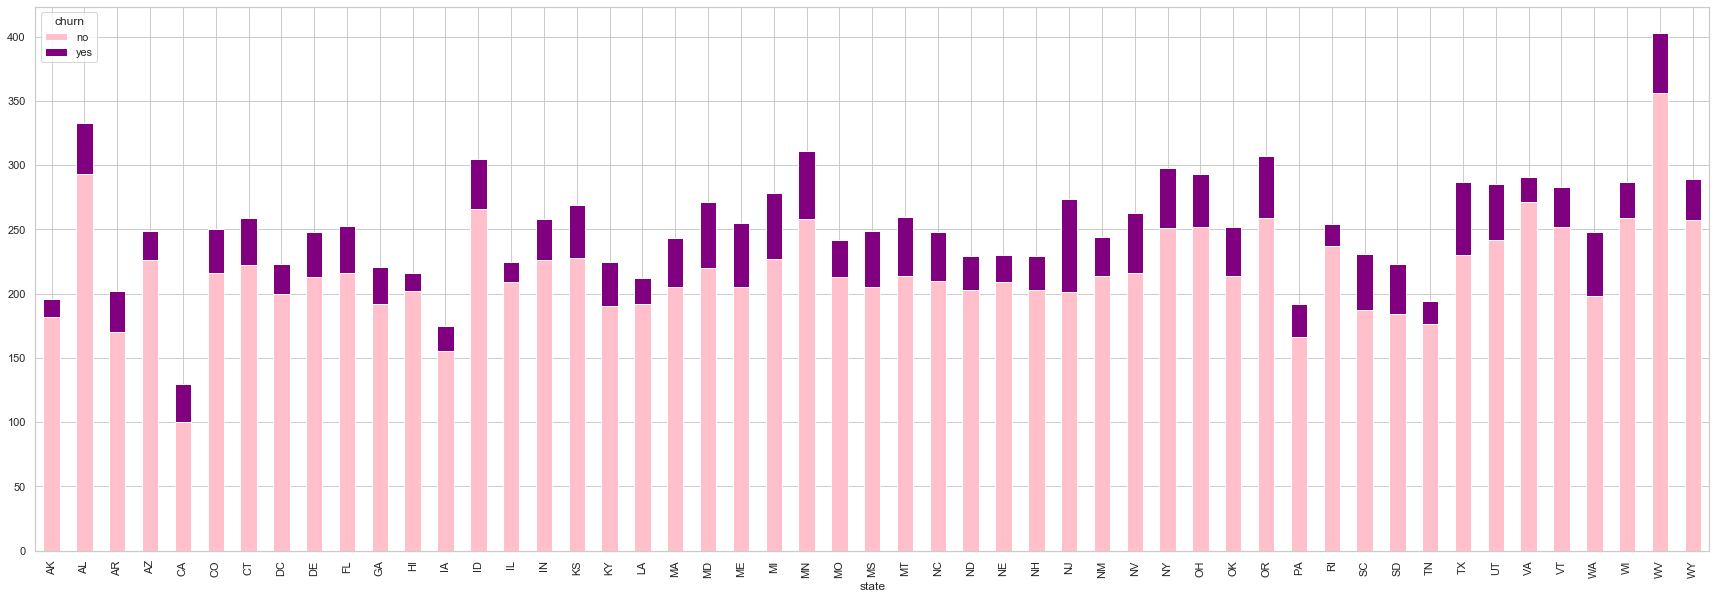

In [29]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10),color=("pink","purple")) 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
recordID                         12892 non-null float64
state                            12892 non-null object
account_length                   12892 non-null float64
area_code                        12892 non-null float64
international_plan               12892 non-null object
voice_mail_plan                  12892 non-null object
number_vmail_messages            12892 non-null float64
total_day_minutes                12892 non-null float64
total_day_calls                  12892 non-null float64
total_day_charge                 12892 non-null float64
total_eve_minutes                12892 non-null float64
total_eve_calls                  12892 non-null float64
total_eve_charge                 12892 non-null float64
total_night_minutes              12892 non-null float64
total_night_calls                12892 non-null float64
total_night_charge               12892 non-null float6

In [31]:
df.select_dtypes(include='object').head(1)

,state,international_plan,voice_mail_plan,churn
0,HI,no,yes,no


There are 4 categorical columns.
These columns need converted to numerical.

Label Encoder

In [32]:
label_encoder=preprocessing.LabelEncoder()
# Discrete value integer encoder

In [33]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

In [34]:
df.dtypes

recordID                         float64
state                              int32
account_length                   float64
area_code                        float64
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                float64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                              int32
customer_id                      float64
dtype: object

In [35]:
df.drop(["recordID","customer_id"],inplace=True,axis=1)

In [36]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,11,101.0,510.0,0,1,0.0,70.9,123.0,38.010000,211.9,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3.0,0
1,26,137.0,510.0,0,1,0.0,223.6,86.0,38.010000,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0.0,0
2,35,103.0,408.0,0,1,29.0,294.7,95.0,36.526667,237.3,105.0,20.17,300.3,127.0,13.51,8.9,6.0,3.70,1.0,0
3,32,99.0,415.0,0,0,0.0,216.8,123.0,35.043333,126.4,88.0,10.74,220.6,82.0,9.93,8.3,2.0,4.24,1.0,0
4,40,108.0,415.0,0,0,0.0,197.4,78.0,33.560000,124.0,101.0,11.39,204.5,86.0,9.20,7.7,4.0,2.08,2.0,0


In [37]:
# X = df.as_matrix().astype(np.float)
# scaler=preprocessing.StandardScaler()
# X=scaler.fit_transform(X)
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X=df.iloc[:,:19]
y=df.iloc[:,19]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=10,max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred=model.predict(x_test)

In [43]:
model.coef_

array([[-9.62980556e-04,  3.48865851e-04, -4.39631779e-03,
         1.42472559e+00, -5.29774462e-01, -3.19583147e-03,
         5.28120524e-04, -5.76889146e-05,  2.00633873e-04,
         9.35354059e-05, -3.71240465e-04,  3.19743307e-04,
         1.50271499e-04, -6.00824136e-04,  9.38788379e-05,
         1.49537804e-03, -1.31500400e-02,  2.59671142e-04,
         4.57176443e-02]])

In [44]:
model.intercept_

array([-4.21355506])

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
con_mat=confusion_matrix(y_test,pred)
print(con_mat)

[[3306   34]
 [ 478   50]]


In [47]:
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print(con_mat)

[[  50  478]
 [  34 3306]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

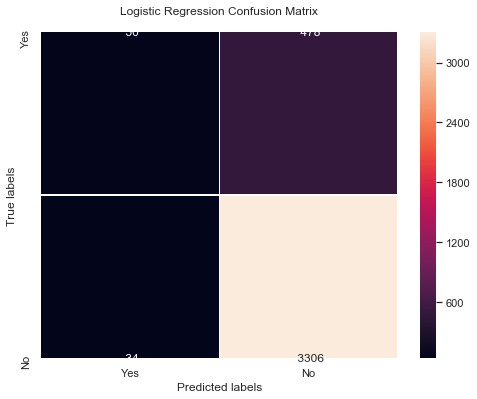

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt    
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(con_mat, annot=True, ax = ax,fmt=" ", linewidths=.5)#annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix\n')
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])


In [49]:
accuracy=(con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.8676318510858325


In [50]:
TP=con_mat[0,0]
FN=con_mat[0,1]
FP=con_mat[1,0]
TN=con_mat[1,1]
Recall=TP/(TP+FN)
print("Recall: ",Recall)
Precision=TP/(TP+FP)
print("Precision: ",Precision)
FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Recall:  0.0946969696969697
Precision:  0.5952380952380952
F-Measure:  0.1633986928104575


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,auc

Text(0.5, 1.0, 'ROC Curve')

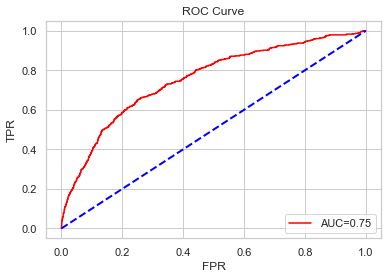

In [52]:
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [53]:
print("ROC_AUC Score: ",roc_auc_score(y_test,preds))

ROC_AUC Score:  0.7539032729994557


In [54]:
df["churn"].value_counts()

0    11092
1     1800
Name: churn, dtype: int64

# KNN 

In [55]:
X=df.iloc[:,:19]
Y=df.iloc[:,19]
test_size=0.2
seed=10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

In [56]:
len(X_train), len(y_train)

(10313, 10313)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn.score(X_test, y_test) #Accuracy on test data

0.8654517254749903

In [60]:
knn.score(X_train,y_train) #Accuracy on train data

0.9014835644332396

In [61]:
pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred, labels = [1,0]))

[[  97  259]
 [  88 2135]]


In [62]:
knncm=confusion_matrix(y_test,pred, labels = [1,0])

In [63]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,100)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 19}

In [64]:
score = {}
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score[i] = knn.score(X_test, y_test)

#score

error = {}

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error[i]=np.mean(pred_i != y_test)

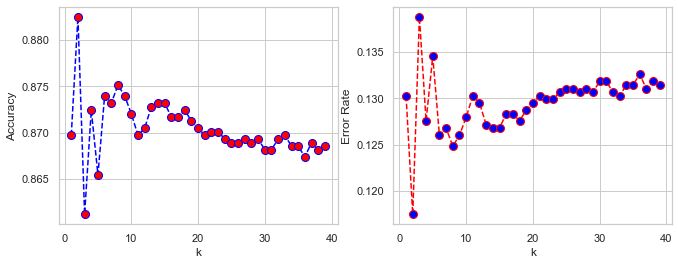

In [65]:
 x = list(score.keys())
y=list(score.values())
plt.figure(figsize = (11, 4))
plt.subplot(1,2,1,)
plt.plot(x, y, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=8)
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(list(error.keys()), list(error.values()), color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=8)
plt.xlabel('k')
plt.ylabel('Error Rate')

plt.show()

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

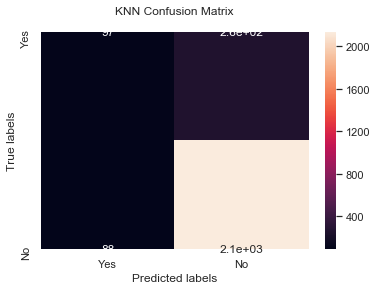

In [66]:
ax= plt.subplot()
sns.heatmap(knncm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('KNN Confusion Matrix\n')
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])

In [67]:
TP=knncm[0,0]
FN=knncm[0,1]
FP=knncm[1,0]
TN=knncm[1,1]
Recall=TP/(TP+FN)
print("Recall: ",Recall)
Precision=TP/(TP+FP)
print("Precision: ",Precision)
FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Recall:  0.27247191011235955
Precision:  0.5243243243243243
F-Measure:  0.35859519408502766


Text(0.5, 1.0, 'ROC Curve')

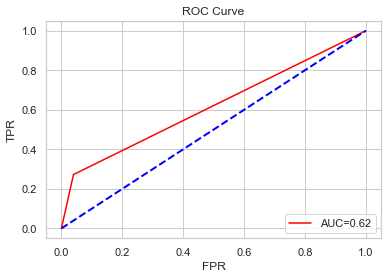

In [68]:
from sklearn import metrics
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,pred,drop_intermediate=False)
roc_auc=metrics.auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

# SVC

In [69]:

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [71]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.transform(X_test)

In [72]:
X_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.746315,-1.208956,-1.087874,-0.328737,1.625364,1.610450,-1.256446,-0.192424,-1.274988,0.285581,-0.490920,0.282491,-0.912459,-0.010995,-0.912234,-0.778794,0.379647,-0.804603,0.365004
1,1.218424,-0.004364,-1.087874,-0.328737,-0.615247,-0.609553,0.121977,1.244922,0.115808,-0.453196,-0.294178,-0.461581,1.185746,-0.471205,1.515540,-0.636905,1.581262,-1.722483,-0.451026
2,-0.130459,1.098301,-0.304576,-0.328737,-0.615247,-0.609553,-0.615284,1.244922,-0.611539,1.921445,-0.702795,1.925990,0.747338,1.007046,1.677555,-1.724718,-1.242532,-1.668490,1.181034
3,0.746315,-1.616665,-0.304576,-0.328737,-0.615247,-0.609553,0.344207,-0.377888,1.070197,-0.349209,-0.324446,-1.642284,0.562745,-0.596717,0.567996,0.261723,0.379647,0.302253,1.181034
4,0.813759,-0.430605,1.653671,-0.328737,-0.615247,-0.609553,0.748124,-1.258842,0.768381,-1.815899,1.975914,-1.813993,0.110493,-1.684486,-1.130709,0.734686,-0.701805,0.747695,0.365004


In [73]:
svm_classifier= SVC(probability=True)
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [74]:
# Predict
y_pred_svm= svm_classifier.predict(X_test)
#Classification Report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2780
           1       0.83      0.38      0.53       443

    accuracy                           0.90      3223
   macro avg       0.87      0.69      0.74      3223
weighted avg       0.90      0.90      0.89      3223



Text(30.5, 0.5, 'predicted label')

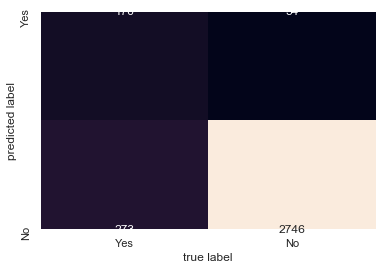

In [75]:
mat_svm = confusion_matrix(y_test, y_pred_svm, labels = [1,0])
sns.heatmap(mat_svm.T,  annot=True, fmt='d', cbar=False,
          xticklabels=['Yes','No'],
          yticklabels=['Yes','No'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [76]:
print(mat_svm)

[[ 170  273]
 [  34 2746]]


In [77]:
TP=mat_svm[0,0]
FN=mat_svm[0,1]
FP=mat_svm[1,0]
TN=mat_svm[1,1]
Recall=TP/(TP+FN)
print("Recall: ",Recall)
Precision=TP/(TP+FP)
print("Precision: ",Precision)
FM=(2*Recall*Precision)/(Recall+Precision)
print("F-Measure: ",FM)

Recall:  0.3837471783295711
Precision:  0.8333333333333334
F-Measure:  0.5255023183925812


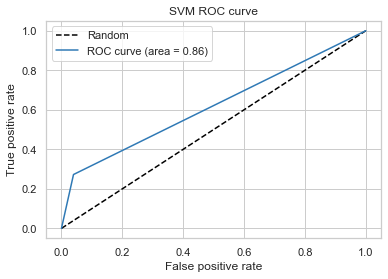

In [78]:
y_pred_svm_proba=svm_classifier.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_pred_svm_proba)
roc_auc=auc(fpr_svm,tpr_svm)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')

In [79]:
# X=df.iloc[:,:19]
# Y=df.iloc[:,19]

In [80]:
# from matplotlib import pyplot as plt
# from sklearn import svm

# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['input1', 'input2']
# svm = svm.SVC(kernel='linear')
# svm.fit(X,Y)
# f_importances(svm.coef_, features_names)